# 2021년 지역별 사망 교통사고 데이터 분석하기


*   공공데이터 포털 : https://www.data.go.kr/data/15070340/fileData.do
*   도로교통공단_사망 교통사고 정보_20211231.csv


## 패키지 설치 및 라이브러리 임포트

In [ ]:
pip install koreanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 62.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd

# 차트
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

# 지도 패키지
import folium

## 데이터 준비하기

In [ ]:
df = pd.read_csv('/content/도로교통공단_사망 교통사고 정보_20211231.csv', encoding='EUC-KR')
df

,발생년,발생년월일시,주야,요일,사망자수,부상자수,중상자수,경상자수,부상신고자수,발생지시도,...,사고유형,가해자법규위반,도로형태_대분류,도로형태,가해자_당사자종별,피해자_당사자종별,발생위치X(UTMK),발생위치Y(UTMK),경도,위도
0,2021,2021-01-01 03:00,야,금,1,3,0,3,0,경북,...,추돌,안전운전 의무 불이행,교차로,교차로부근,승용차,승용차,1097010.0,1793385.0,128.578152,36.132653
1,2021,2021-01-01 09:00,주,금,1,0,0,0,0,충남,...,공작물충돌,안전운전 의무 불이행,단일로,기타단일로,승용차,없음,902369.0,1847109.0,126.408201,36.616845
2,2021,2021-01-01 15:00,주,금,1,0,0,0,0,강원,...,측면충돌,안전운전 의무 불이행,교차로,교차로내,원동기장치자전거,승용차,1123975.0,1974509.0,128.907484,37.761842
3,2021,2021-01-01 19:00,야,금,1,0,0,0,0,전남,...,횡단중,안전운전 의무 불이행,단일로,기타단일로,화물차,보행자,886507.0,1613961.0,126.263573,34.513391
4,2021,2021-01-01 21:00,야,금,1,0,0,0,0,경기,...,기타,기타,단일로,기타단일로,승용차,보행자,953522.0,1915403.0,126.976011,37.236327
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2811,2021,2021-12-31 16:00,주,금,1,0,0,0,0,경북,...,정면충돌,안전운전 의무 불이행,교차로,교차로내,승용차,이륜차,1119020.0,1766895.0,128.818730,35.891434
2812,2021,2021-12-31 17:00,주,금,1,0,0,0,0,제주,...,추돌,안전운전 의무 불이행,단일로,기타단일로,화물차,화물차,940588.0,1503049.6,126.860248,33.517699
2813,2021,2021-12-31 18:00,야,금,1,0,0,0,0,강원,...,횡단중,보행자 보호의무 위반,단일로,기타단일로,승용차,보행자,1023127.0,1982332.0,127.762845,37.840465
2814,2021,2021-12-31 19:00,야,금,1,0,0,0,0,경북,...,횡단중,보행자 보호의무 위반,교차로,교차로횡단보도내,승용차,보행자,1058805.0,1824755.0,128.155943,36.418521


## 데이터 확인하기

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2816 entries, 0 to 2815
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   발생년          2816 non-null   int64  
 1   발생년월일시       2816 non-null   object 
 2   주야           2816 non-null   object 
 3   요일           2816 non-null   object 
 4   사망자수         2816 non-null   int64  
 5   부상자수         2816 non-null   int64  
 6   중상자수         2816 non-null   int64  
 7   경상자수         2816 non-null   int64  
 8   부상신고자수       2816 non-null   int64  
 9   발생지시도        2816 non-null   object 
 10  발생지시군구       2816 non-null   object 
 11  사고유형_대분류     2816 non-null   object 
 12  사고유형_중분류     2816 non-null   object 
 13  사고유형         2816 non-null   object 
 14  가해자법규위반      2816 non-null   object 
 15  도로형태_대분류     2816 non-null   object 
 16  도로형태         2816 non-null   object 
 17  가해자_당사자종별    2816 non-null   object 
 18  피해자_당사자종별    2816 non-null   object 
 19  발생위치X(

In [ ]:
# 데이터 결측치 확인하기
df.isna().sum()

발생년            0
발생년월일시         0
주야             0
요일             0
사망자수           0
부상자수           0
중상자수           0
경상자수           0
부상신고자수         0
발생지시도          0
발생지시군구         0
사고유형_대분류       0
사고유형_중분류       0
사고유형           0
가해자법규위반        0
도로형태_대분류       0
도로형태           0
가해자_당사자종별      0
피해자_당사자종별      0
발생위치X(UTMK)    0
발생위치Y(UTMK)    0
경도             0
위도             0
dtype: int64

## 데이터 전처리

### 발생년월일시 컬럼에서 시간 컬럼 파생 변수 만들기

In [ ]:
# 2021-01-01 03:00 -> 03으로 분리하기

# 시간으로 분리한 데이터를 발생시간 컬럼으로 담기
df['발생시간'] = df['발생년월일시'].str[-5:-3]

# 발생시간 컬럼을 숫자 데이터타입으로 변경
df = df.astype({'발생시간':'int'})
df.head()

,발생년,발생년월일시,주야,요일,사망자수,부상자수,중상자수,경상자수,부상신고자수,발생지시도,...,가해자법규위반,도로형태_대분류,도로형태,가해자_당사자종별,피해자_당사자종별,발생위치X(UTMK),발생위치Y(UTMK),경도,위도,발생시간
0,2021,2021-01-01 03:00,야,금,1,3,0,3,0,경북,...,안전운전 의무 불이행,교차로,교차로부근,승용차,승용차,1097010.0,1793385.0,128.578152,36.132653,3
1,2021,2021-01-01 09:00,주,금,1,0,0,0,0,충남,...,안전운전 의무 불이행,단일로,기타단일로,승용차,없음,902369.0,1847109.0,126.408201,36.616845,9
2,2021,2021-01-01 15:00,주,금,1,0,0,0,0,강원,...,안전운전 의무 불이행,교차로,교차로내,원동기장치자전거,승용차,1123975.0,1974509.0,128.907484,37.761842,15
3,2021,2021-01-01 19:00,야,금,1,0,0,0,0,전남,...,안전운전 의무 불이행,단일로,기타단일로,화물차,보행자,886507.0,1613961.0,126.263573,34.513391,19
4,2021,2021-01-01 21:00,야,금,1,0,0,0,0,경기,...,기타,단일로,기타단일로,승용차,보행자,953522.0,1915403.0,126.976011,37.236327,21


### 발생년월일시 컬럼에서 발생연월일 컬럼 파생 변수 만들기

In [ ]:
# 발생년월일시(string) -> 발생년월일(날짜타입, datetime)으로 변경
# 2021-01-01 03:00 -> 20190101(년월일) 슬라이싱 -> YYYY-MM-DD(날짜 형태로 변경) ->2021-01-01

df['발생년월일'] = pd.to_datetime(df['발생년월일시'].str[:-6], format='%Y-%m-%d', errors='raise')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2816 entries, 0 to 2815
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   발생년          2816 non-null   int64         
 1   발생년월일시       2816 non-null   object        
 2   주야           2816 non-null   object        
 3   요일           2816 non-null   object        
 4   사망자수         2816 non-null   int64         
 5   부상자수         2816 non-null   int64         
 6   중상자수         2816 non-null   int64         
 7   경상자수         2816 non-null   int64         
 8   부상신고자수       2816 non-null   int64         
 9   발생지시도        2816 non-null   object        
 10  발생지시군구       2816 non-null   object        
 11  사고유형_대분류     2816 non-null   object        
 12  사고유형_중분류     2816 non-null   object        
 13  사고유형         2816 non-null   object        
 14  가해자법규위반      2816 non-null   object        
 15  도로형태_대분류     2816 non-null   object        
 16  도로형태  

### 필요없는 컬럼 삭제 및 컬럼 정렬

In [ ]:
# 필요없는 컬럼 삭제

del df['발생년월일시']
df.head()

,발생년,주야,요일,사망자수,부상자수,중상자수,경상자수,부상신고자수,발생지시도,발생지시군구,...,도로형태_대분류,도로형태,가해자_당사자종별,피해자_당사자종별,발생위치X(UTMK),발생위치Y(UTMK),경도,위도,발생시간,발생년월일
0,2021,야,금,1,3,0,3,0,경북,군위군,...,교차로,교차로부근,승용차,승용차,1097010.0,1793385.0,128.578152,36.132653,3,2021-01-01
1,2021,주,금,1,0,0,0,0,충남,서산시,...,단일로,기타단일로,승용차,없음,902369.0,1847109.0,126.408201,36.616845,9,2021-01-01
2,2021,주,금,1,0,0,0,0,강원,강릉시,...,교차로,교차로내,원동기장치자전거,승용차,1123975.0,1974509.0,128.907484,37.761842,15,2021-01-01
3,2021,야,금,1,0,0,0,0,전남,진도군,...,단일로,기타단일로,화물차,보행자,886507.0,1613961.0,126.263573,34.513391,19,2021-01-01
4,2021,야,금,1,0,0,0,0,경기,수원시,...,단일로,기타단일로,승용차,보행자,953522.0,1915403.0,126.976011,37.236327,21,2021-01-01


In [ ]:
# 컬럼 순서 정리 발생년, 발생년월일, 발생시간, 주야 ~~~

# 컬럼명을 리스트로 만들기
col1 = df.columns[-2:].to_list()
col1.reverse()
col2 = df.columns[1:-2].to_list()
col_list = col1 + col2
col_list.insert(0, '발생년')

# 원하는 컬럼 순서로 추출 후 다시 담기
df = df[col_list]
df

,발생년,발생년월일,발생시간,주야,요일,사망자수,부상자수,중상자수,경상자수,부상신고자수,...,사고유형,가해자법규위반,도로형태_대분류,도로형태,가해자_당사자종별,피해자_당사자종별,발생위치X(UTMK),발생위치Y(UTMK),경도,위도
0,2021,2021-01-01,3,야,금,1,3,0,3,0,...,추돌,안전운전 의무 불이행,교차로,교차로부근,승용차,승용차,1097010.0,1793385.0,128.578152,36.132653
1,2021,2021-01-01,9,주,금,1,0,0,0,0,...,공작물충돌,안전운전 의무 불이행,단일로,기타단일로,승용차,없음,902369.0,1847109.0,126.408201,36.616845
2,2021,2021-01-01,15,주,금,1,0,0,0,0,...,측면충돌,안전운전 의무 불이행,교차로,교차로내,원동기장치자전거,승용차,1123975.0,1974509.0,128.907484,37.761842
3,2021,2021-01-01,19,야,금,1,0,0,0,0,...,횡단중,안전운전 의무 불이행,단일로,기타단일로,화물차,보행자,886507.0,1613961.0,126.263573,34.513391
4,2021,2021-01-01,21,야,금,1,0,0,0,0,...,기타,기타,단일로,기타단일로,승용차,보행자,953522.0,1915403.0,126.976011,37.236327
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2811,2021,2021-12-31,16,주,금,1,0,0,0,0,...,정면충돌,안전운전 의무 불이행,교차로,교차로내,승용차,이륜차,1119020.0,1766895.0,128.818730,35.891434
2812,2021,2021-12-31,17,주,금,1,0,0,0,0,...,추돌,안전운전 의무 불이행,단일로,기타단일로,화물차,화물차,940588.0,1503049.6,126.860248,33.517699
2813,2021,2021-12-31,18,야,금,1,0,0,0,0,...,횡단중,보행자 보호의무 위반,단일로,기타단일로,승용차,보행자,1023127.0,1982332.0,127.762845,37.840465
2814,2021,2021-12-31,19,야,금,1,0,0,0,0,...,횡단중,보행자 보호의무 위반,교차로,교차로횡단보도내,승용차,보행자,1058805.0,1824755.0,128.155943,36.418521


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2816 entries, 0 to 2815
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   발생년          2816 non-null   int64         
 1   발생년월일        2816 non-null   datetime64[ns]
 2   발생시간         2816 non-null   int64         
 3   주야           2816 non-null   object        
 4   요일           2816 non-null   object        
 5   사망자수         2816 non-null   int64         
 6   부상자수         2816 non-null   int64         
 7   중상자수         2816 non-null   int64         
 8   경상자수         2816 non-null   int64         
 9   부상신고자수       2816 non-null   int64         
 10  발생지시도        2816 non-null   object        
 11  발생지시군구       2816 non-null   object        
 12  사고유형_대분류     2816 non-null   object        
 13  사고유형_중분류     2816 non-null   object        
 14  사고유형         2816 non-null   object        
 15  가해자법규위반      2816 non-null   object        
 16  도로형태_대

### 정제된 데이터셋 저장하기

In [ ]:
# df.to_csv('2019년 지역별 교통사고 데이터 전처리.csv', encoding='utf-8-sig', index=False)

## 데이터 시각화

## 광주광역시 교통사고 발생 데이터 분석

### 데이터 준비하기

In [ ]:
gj_df = df[df['발생지시도']=='광주']
gj_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49 entries, 7 to 2751
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   발생년          49 non-null     int64         
 1   발생년월일        49 non-null     datetime64[ns]
 2   발생시간         49 non-null     int64         
 3   주야           49 non-null     object        
 4   요일           49 non-null     object        
 5   사망자수         49 non-null     int64         
 6   부상자수         49 non-null     int64         
 7   중상자수         49 non-null     int64         
 8   경상자수         49 non-null     int64         
 9   부상신고자수       49 non-null     int64         
 10  발생지시도        49 non-null     object        
 11  발생지시군구       49 non-null     object        
 12  사고유형_대분류     49 non-null     object        
 13  사고유형_중분류     49 non-null     object        
 14  사고유형         49 non-null     object        
 15  가해자법규위반      49 non-null     object        
 16  도로형태_대분류

### 시간대 별 교통하고 사망자 현황

In [ ]:
fig = px.bar(gj_df, x='사망자수', y='발생시간', orientation='h')
fig.show()

### 요일 별 교통하고 사망자 현황

In [ ]:
fig = px.bar(gj_df, x='사망자수', y='요일', orientation='h')
fig.show()

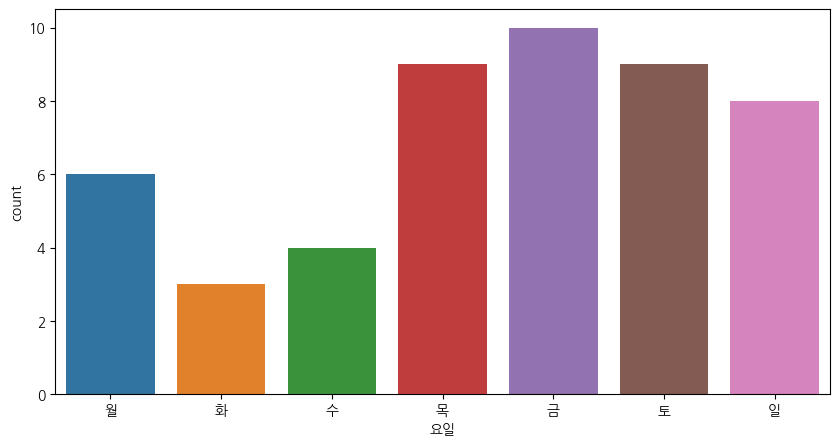

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=gj_df, x='요일', order=['월', '화', '수', '목', '금', '토', '일'])
plt.show()

### 교통사고 지역구별 사망자 현황

In [ ]:
fig = px.bar(gj_df, x='사망자수', y='발생지시군구', orientation='h')
fig.show()

## 지도를 활용하여 교통사고 현황 분석

### 기본 지도

In [ ]:
import folium

map = folium.Map(location=[35.1595454, 126.8526012]) # 광주광역시 경도, 위도
map

### 광주광역시 사망교통사고 위치 지도 시각화

#### 사망자수에 따른 마커 크기로 시각화

In [ ]:
# 사망사고 위치에 CircleMarker 표출
# CircleMarker 사이즈 = 사망자수 + 경상자수
# CircleMarker를 클릭하면, popup으로 사고유형 나타나도록 구현

# CircleMarker 사이즈(radius) -> 실수형 데이터만 취급
# 사망자수, 경상자수 컬럼 데이터타입 -> 실수형으로 변경

gj_df = gj_df.astype({'사망자수':'float', '경상자수':'float'})
gj_df.head()

,발생년,발생년월일,발생시간,주야,요일,사망자수,부상자수,중상자수,경상자수,부상신고자수,...,사고유형,가해자법규위반,도로형태_대분류,도로형태,가해자_당사자종별,피해자_당사자종별,발생위치X(UTMK),발생위치Y(UTMK),경도,위도
7,2021,2021-01-01,22,야,금,1.0,3,1,2.0,0,...,정면충돌,안전운전 의무 불이행,교차로,교차로내,승용차,승용차,938071.4,1689913.5,126.819666,35.202650
71,2021,2021-01-15,2,야,금,1.0,0,0,0.0,0,...,추돌,안전운전 의무 불이행,단일로,기타단일로,승용차,개인형이동수단(PM),945591.0,1685871.0,126.902538,35.166636
251,2021,2021-02-08,14,주,월,1.0,0,0,0.0,0,...,기타,안전운전 의무 불이행,단일로,기타단일로,이륜차,없음,925706.0,1688110.0,126.683997,35.185550
266,2021,2021-02-11,21,야,목,1.0,0,0,0.0,0,...,측면충돌,신호위반,교차로,교차로내,승용차,이륜차,940247.0,1683473.0,126.844032,35.144711
281,2021,2021-02-14,22,야,일,1.0,1,1,0.0,0,...,기타,안전운전 의무 불이행,교차로,교차로내,승용차,없음,934598.0,1688177.0,126.781649,35.186773


#### 사망자수, 경상자수에 따른 CircleMaker 지도에 표출

In [ ]:
# 1) 지도 준비
map = folium.Map(location=[35.1595454, 126.8526012]) # 광주광역시 경도, 위도

# 2) CircleMaker 지도에 표출 -> for문을 이용해서 gj_df 데이터가 있을때까지 CircleMaker 지도에 add
for n in gj_df.index:
  # CircleMaker_size
  cnt = gj_df['사망자수'][n] + gj_df['경상자수'][n]

  # 위도, 경도 추출
  lat = gj_df['위도'][n]
  lng = gj_df['경도'][n]

  # CircleMaker 지도에 add
  folium.CircleMarker([lat, lng], radius=cnt*10, popup=gj_df['사고유형'][n],
                      color='#F70000', fill_color='#F70000').add_to(map)

map

#### 광주광역시 사망교통사고 지도 시각화 저장하기

In [ ]:
map.save('2019_대전교통사고현황.html')